In [1]:
from models import *
from functions import *
from plotting import *

c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:138: SyntaxWarning: invalid escape sequence '\m'
  cbar = plt.colorbar(contourf, label="velocity ($\mathregular{ms^{-1}}$)")
c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:208: SyntaxWarning: invalid escape sequence '\m'
  "0.2 - 0.3 $\mathregular{ms^{-1}}$",
c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:209: SyntaxWarning: invalid escape sequence '\m'
  "0.3 - 0.4 $\mathregular{ms^{-1}}$",
c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:210: SyntaxWarning: invalid escape sequence '\m'
  "0.4 - 0.5 $\mathregular{ms^{-1}}$",
c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:211: SyntaxWarning: invalid escape sequence '\m'
  "0.5 - " + max_label + " $\mathregular{ms^{-1}}$",
c:\Users\matth\OneDrive\Documents\GitHub\GGS\plotting.py:292: SyntaxWarning: invalid escape sequence '\m'
  cbar = plt.colorbar(contourf, label="RMSE ($\mathregular{ms^{-1}}$)")
c:\Users\matth\OneDrive\Documents\GitHub\GGS\p

In [2]:
dates = ('2024-11-19', '2024-11-19')
depth = 1000
lon_min = -100
lon_max = -76
lat_min = 15
lat_max = 32

extent = (lat_min, lon_min, lat_max, lon_max)

In [3]:
espc = ESPC()
espc.load()
espc.subset(dates, extent, depth)
subset = espc.subset_data.isel(time=0)
interp = interpolate_depth(subset)
espc_ds = calculate_magnitude(interp)

cmems = CMEMS()
cmems.load()
cmems.subset(dates, extent, depth)
subset = cmems.subset_data.isel(time=0)
interp = interpolate_depth(subset)
cmems_ds = calculate_magnitude(interp)

rtofs = RTOFS()
rtofs.load('east')
rtofs.subset(dates, extent, depth)
subset = rtofs.subset_data.isel(time=0)
interp = interpolate_depth(subset)
rtofs_ds = calculate_magnitude(interp)

Loading ESPC data...
Start time (UTC): 2024-11-20 03:55:07.394248+00:00
Done.
End time (UTC): 2024-11-20 03:55:07.878665+00:00
Runtime: 0:00:00.484417

ESPC: Subsetted data.

ESPC: Interpolating depth...
Start time (UTC): 2024-11-20 03:55:07.943055+00:00
Done.
End time (UTC): 2024-11-20 03:55:24.757561+00:00
Runtime: 0:00:16.814506

ESPC: Calculating magnitude...
Start time (UTC): 2024-11-20 03:55:24.757561+00:00
Done.
End time (UTC): 2024-11-20 03:55:24.768573+00:00
Runtime: 0:00:00.011012

Loading CMEMS data...
Start time (UTC): 2024-11-20 03:55:24.768573+00:00


INFO - 2024-11-20T03:55:25Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2024-11-20T03:55:25Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-11-20T03:55:28Z - Service was not specified, the default one was selected: "arco-geo-series"


Done.
End time (UTC): 2024-11-20 03:55:33.241720+00:00
Runtime: 0:00:08.473147

CMEMS: Subsetted data.

CMEMS: Interpolating depth...
Start time (UTC): 2024-11-20 03:55:33.401740+00:00
Done.
End time (UTC): 2024-11-20 03:57:14.023300+00:00
Runtime: 0:01:40.621560

CMEMS: Calculating magnitude...
Start time (UTC): 2024-11-20 03:57:14.023300+00:00
Done.
End time (UTC): 2024-11-20 03:57:14.033356+00:00
Runtime: 0:00:00.010056

Loading RTOFS data...
Start time (UTC): 2024-11-20 03:57:14.033356+00:00
Model source: RTOFS (East Coast)
Done.
End time (UTC): 2024-11-20 03:57:19.871917+00:00
Runtime: 0:00:05.838561

RTOFS (East Coast): Subsetted data.

RTOFS (East Coast): Interpolating depth...
Start time (UTC): 2024-11-20 03:57:21.475591+00:00
Done.
End time (UTC): 2024-11-20 03:57:26.196894+00:00
Runtime: 0:00:04.721303

RTOFS (East Coast): Calculating magnitude...
Start time (UTC): 2024-11-20 03:57:26.197891+00:00
Done.
End time (UTC): 2024-11-20 03:57:26.206150+00:00
Runtime: 0:00:00.008259


In [4]:
cmems_dac = depth_average(cmems_ds)
espc_dac = depth_average(espc_ds)
rtofs_dac = depth_average(rtofs_ds)

CMEMS: Depth averaging...
Start time (UTC): 2024-11-20 03:57:26.214077+00:00
Done.
End time (UTC): 2024-11-20 03:57:26.220174+00:00
Runtime: 0:00:00.006097

ESPC: Depth averaging...
Start time (UTC): 2024-11-20 03:57:26.220174+00:00
Done.
End time (UTC): 2024-11-20 03:57:26.225185+00:00
Runtime: 0:00:00.005011

RTOFS (East Coast): Depth averaging...
Start time (UTC): 2024-11-20 03:57:26.225185+00:00
Done.
End time (UTC): 2024-11-20 03:57:26.229175+00:00
Runtime: 0:00:00.003990



In [5]:
rmse1 = calculate_rmse(espc_ds, cmems_ds)
rmse2 = calculate_rmse(espc_ds, rtofs_ds)
rmse3 = calculate_rmse(cmems_ds, rtofs_ds)

ESPC & CMEMS: Calculating RMSE...
Start time (UTC): 2024-11-20 03:57:26.238137+00:00
Done.
End time (UTC): 2024-11-20 03:57:31.524961+00:00
Runtime: 0:00:05.286824

ESPC & RTOFS (East Coast): Calculating RMSE...
Start time (UTC): 2024-11-20 03:57:31.525959+00:00
Done.
End time (UTC): 2024-11-20 03:57:34.381027+00:00
Runtime: 0:00:02.855068

CMEMS & RTOFS (East Coast): Calculating RMSE...
Start time (UTC): 2024-11-20 03:57:34.383575+00:00
Done.
End time (UTC): 2024-11-20 03:57:36.090683+00:00
Runtime: 0:00:01.707108



In [6]:
mae1 = calculate_mae(espc_ds, cmems_ds)
mae2 = calculate_mae(espc_ds, rtofs_ds)
mae3 = calculate_mae(cmems_ds, rtofs_ds)

ESPC & CMEMS: Calculating MAE...
Start time (UTC): 2024-11-20 03:57:36.099358+00:00
Done.
End time (UTC): 2024-11-20 03:57:38.829401+00:00
Runtime: 0:00:02.730043

ESPC & RTOFS (East Coast): Calculating MAE...
Start time (UTC): 2024-11-20 03:57:38.831070+00:00
Done.
End time (UTC): 2024-11-20 03:57:41.754170+00:00
Runtime: 0:00:02.923100

CMEMS & RTOFS (East Coast): Calculating MAE...
Start time (UTC): 2024-11-20 03:57:41.755167+00:00
Done.
End time (UTC): 2024-11-20 03:57:43.421648+00:00
Runtime: 0:00:01.666481



CMEMS: Plotting Thresholds...
Start time (UTC): 2024-11-20 03:57:43.429836+00:00


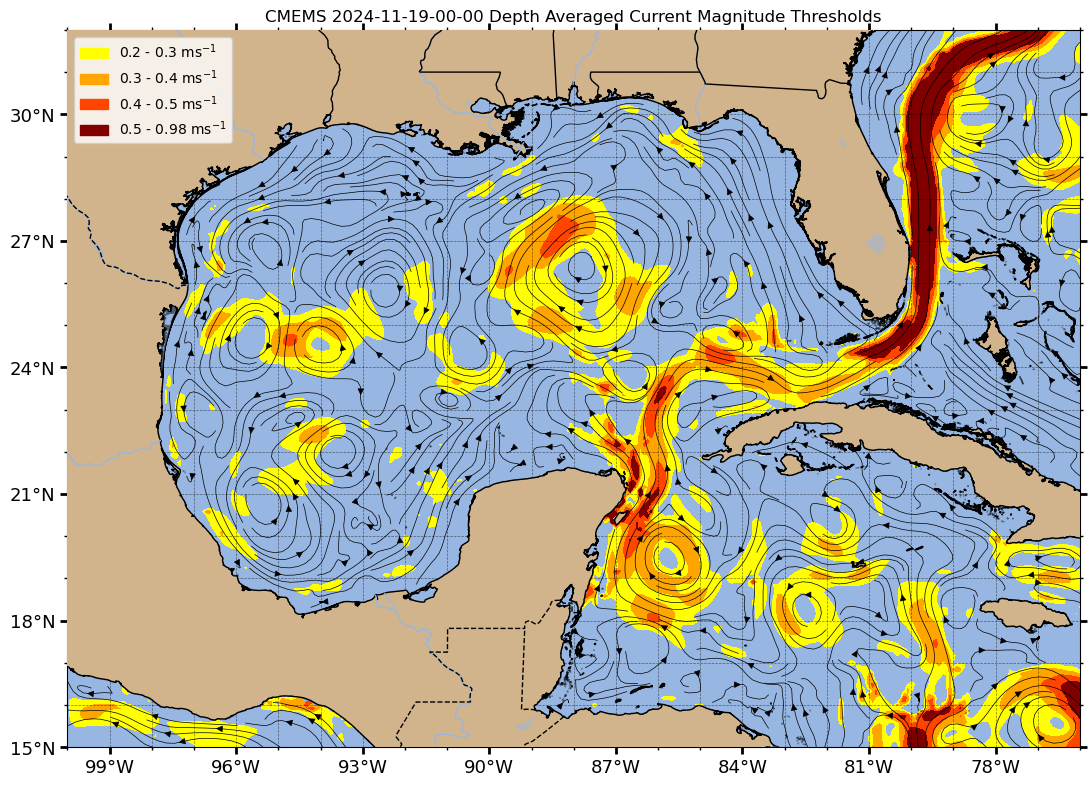

End time (UTC): 2024-11-20 03:58:28.521829+00:00
Runtime: 0:00:45.091993

ESPC: Plotting Thresholds...
Start time (UTC): 2024-11-20 03:58:28.521829+00:00


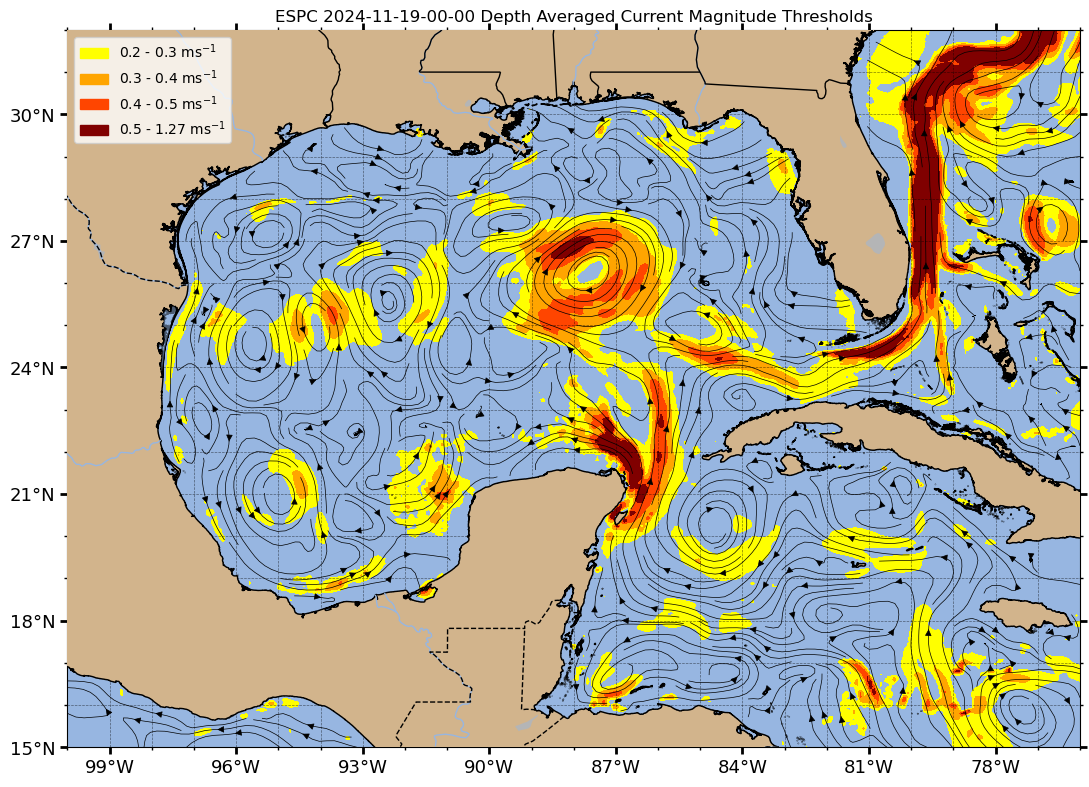

End time (UTC): 2024-11-20 03:58:45.109872+00:00
Runtime: 0:00:16.588043

RTOFS (East Coast): Plotting Thresholds...
Start time (UTC): 2024-11-20 03:58:45.109872+00:00


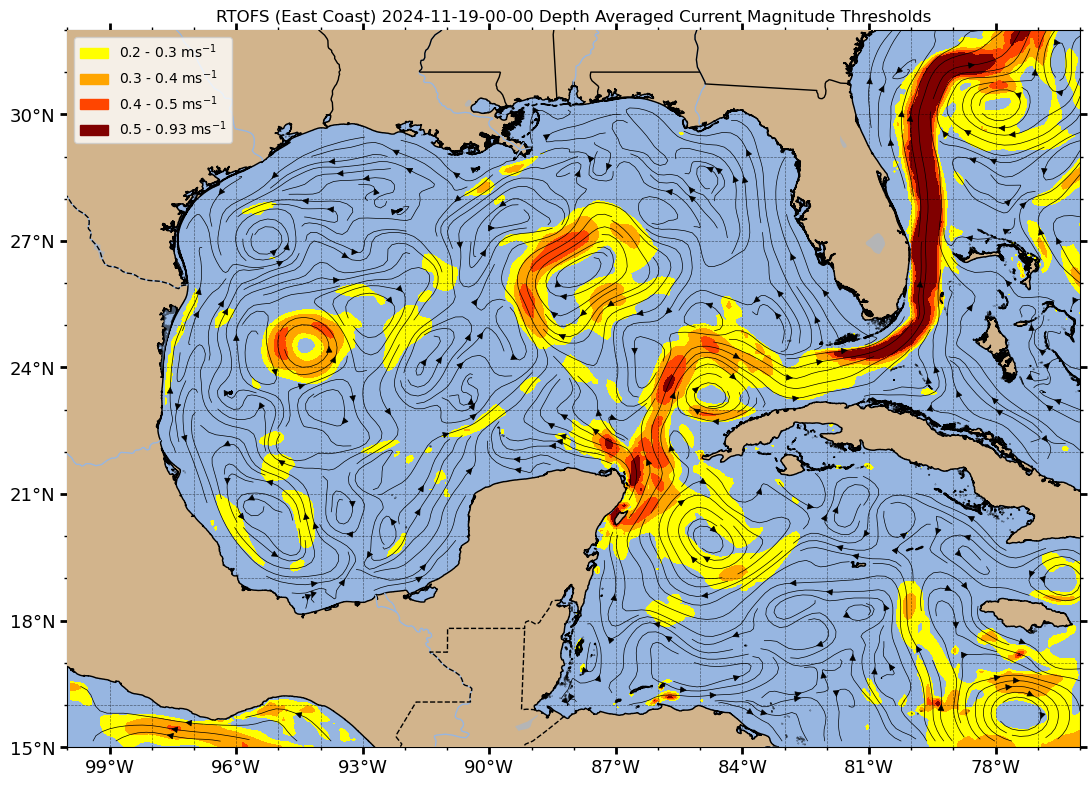

End time (UTC): 2024-11-20 03:58:59.862386+00:00
Runtime: 0:00:14.752514



In [7]:
plot_threshold(cmems_dac, extent, streamlines = True)
plot_threshold(espc_dac, extent, streamlines = True)
plot_threshold(rtofs_dac, extent, streamlines = True)

ESPC & CMEMS: Plotting RMSE...
Start time (UTC): 2024-11-20 03:58:59.882618+00:00


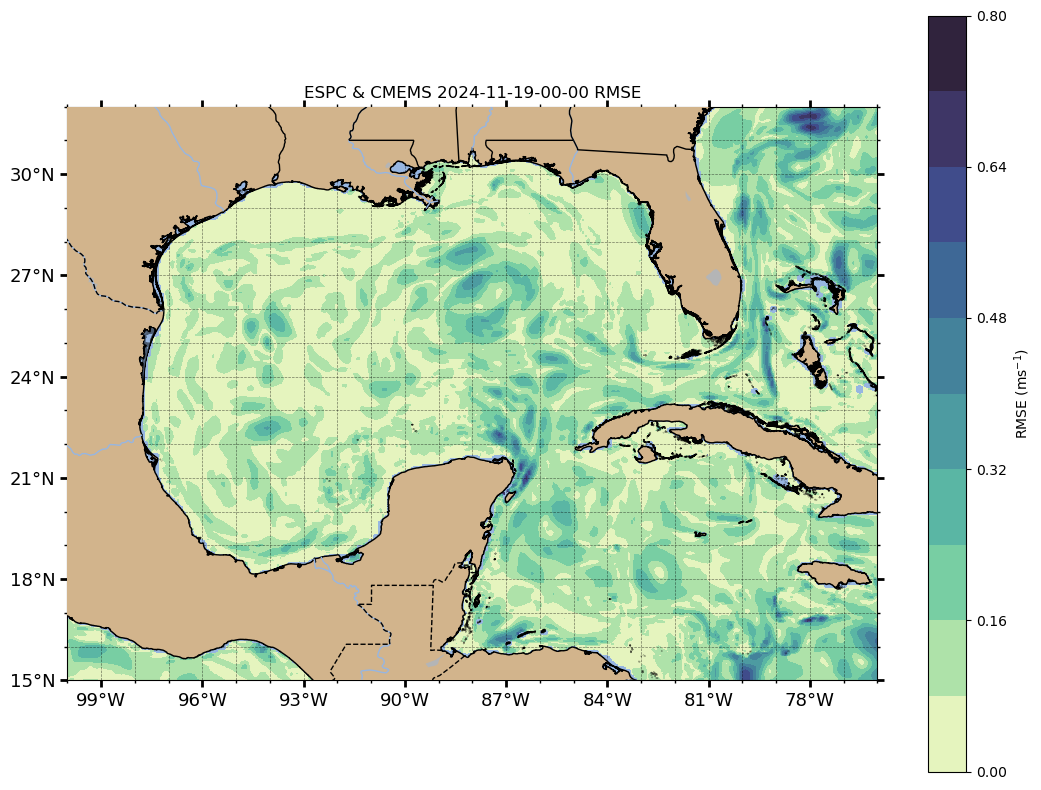

End time (UTC): 2024-11-20 03:59:11.607838+00:00
Runtime: 0:00:11.725220

ESPC & RTOFS (East Coast): Plotting RMSE...
Start time (UTC): 2024-11-20 03:59:11.609833+00:00


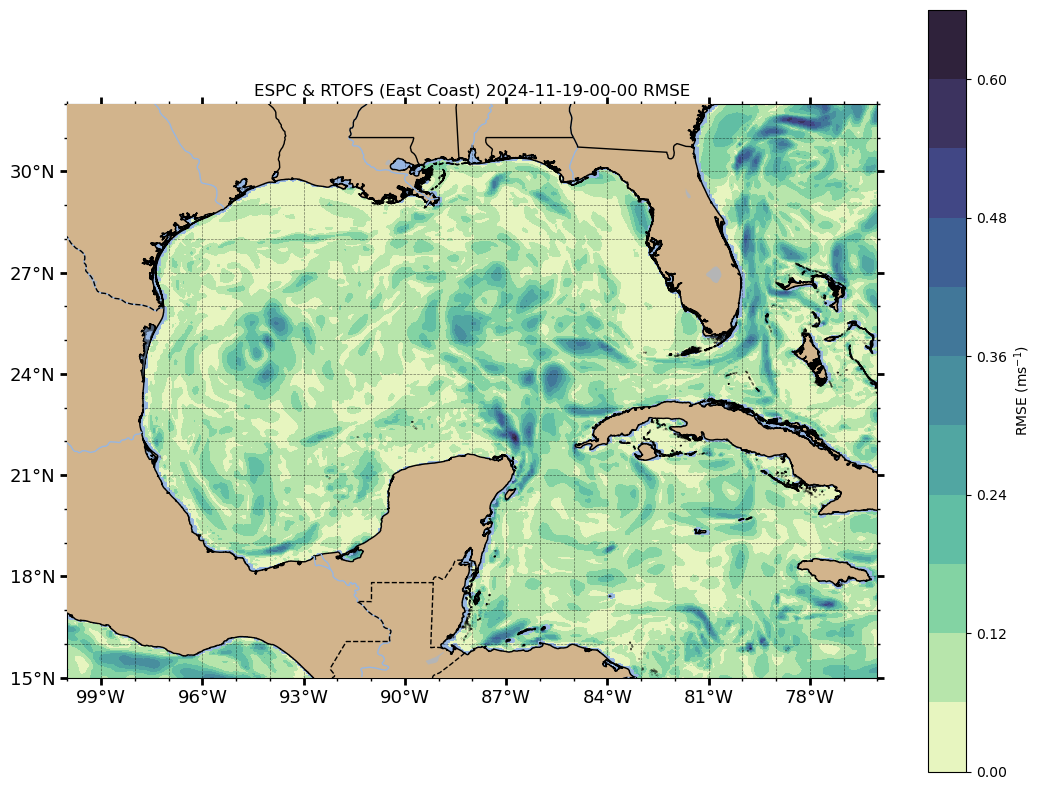

End time (UTC): 2024-11-20 03:59:22.269074+00:00
Runtime: 0:00:10.659241

CMEMS & RTOFS (East Coast): Plotting RMSE...
Start time (UTC): 2024-11-20 03:59:22.269074+00:00


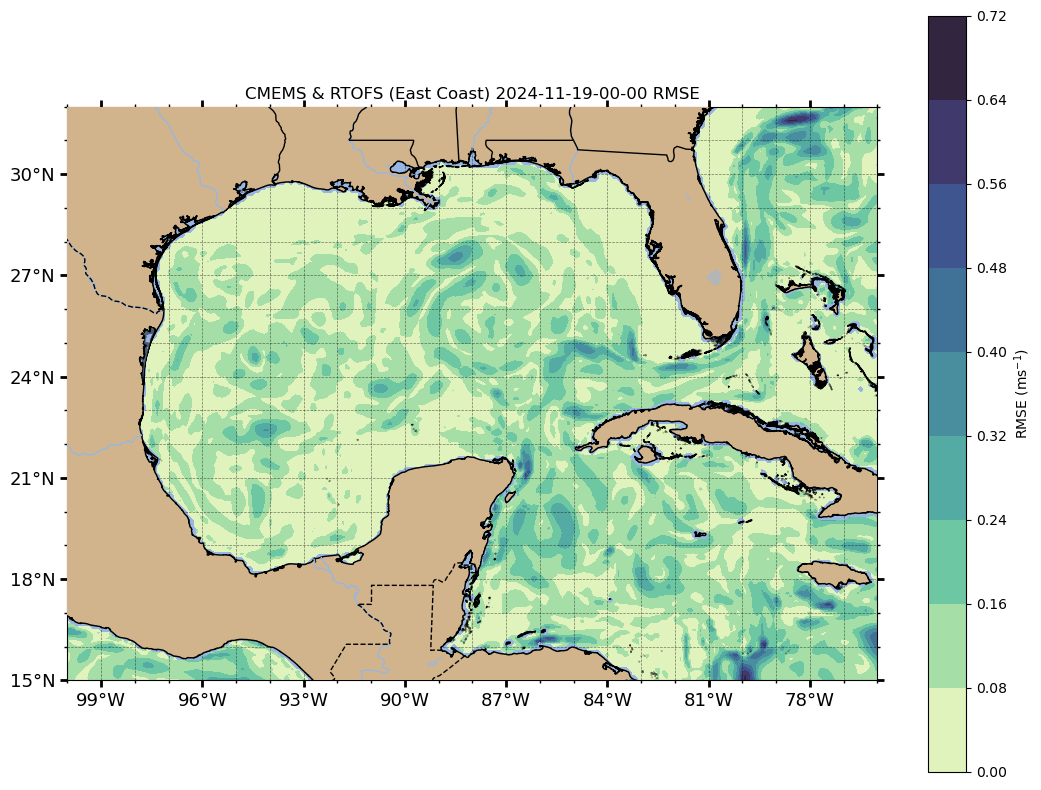

End time (UTC): 2024-11-20 03:59:30.394190+00:00
Runtime: 0:00:08.125116



In [8]:
plot_rmse(rmse1, extent)
plot_rmse(rmse2, extent)
plot_rmse(rmse3, extent)

ESPC & CMEMS: Plotting MAE...
Start time (UTC): 2024-11-20 03:59:30.409094+00:00


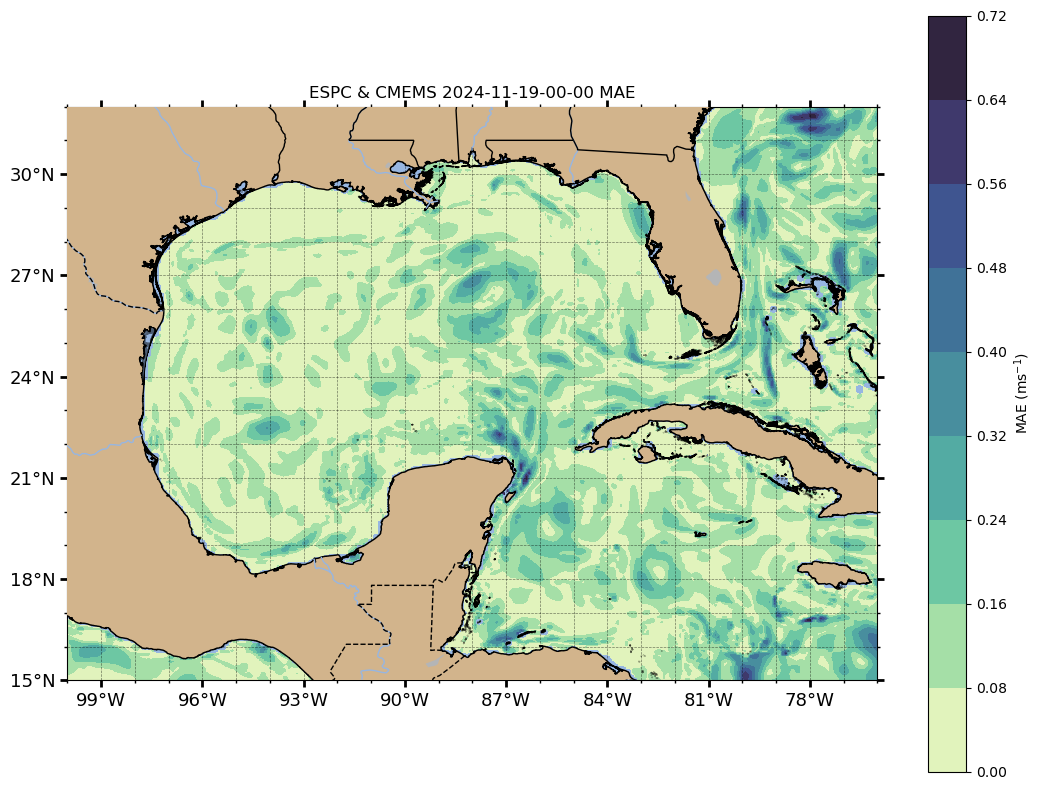

End time (UTC): 2024-11-20 03:59:40.137411+00:00
Runtime: 0:00:09.728317

ESPC & RTOFS (East Coast): Plotting MAE...
Start time (UTC): 2024-11-20 03:59:40.137411+00:00


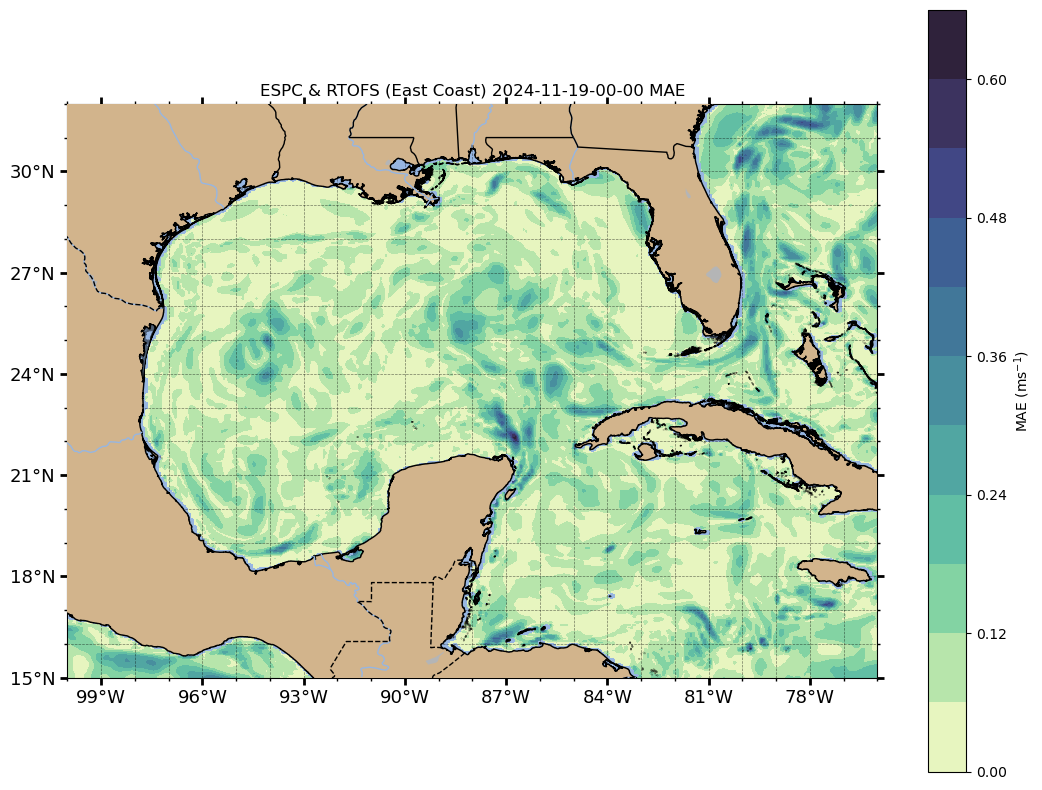

End time (UTC): 2024-11-20 03:59:50.969508+00:00
Runtime: 0:00:10.832097

CMEMS & RTOFS (East Coast): Plotting MAE...
Start time (UTC): 2024-11-20 03:59:50.969508+00:00


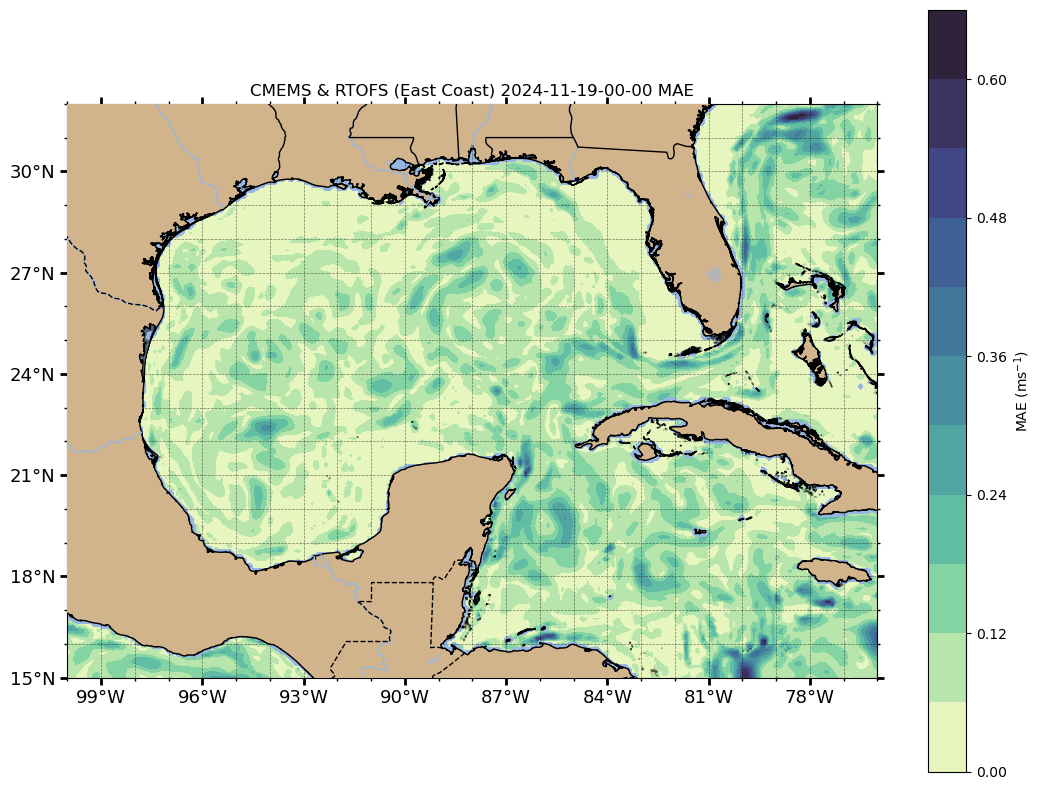

End time (UTC): 2024-11-20 03:59:58.614817+00:00
Runtime: 0:00:07.645309



In [9]:
plot_mae(mae1, extent)
plot_mae(mae2, extent)
plot_mae(mae3, extent)